In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# **ENSEMBLE TECHNIQUE**

In [3]:
import pandas as pd
import numpy as np

**Load Data**

In [4]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

print(data)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

**Finding missing value**

In [5]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Number of values in each class**

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Separating feature and target**

In [7]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


**Splitting the data in 70:30 ratio**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, cohen_kappa_score
from sklearn.metrics import accuracy_score

**For finding best model that handles imbalanced data, we cannot rely on accuracy thats why we use F1 score anf kappa score**

In [11]:
classifiers = [('rfc', RandomForestClassifier()),('dtc', DecisionTreeClassifier()),('svc', SVC()),('knn', KNeighborsClassifier()),('lr', LogisticRegression()),('gnb', GaussianNB()), ('abc', AdaBoostClassifier()),('gbc', GradientBoostingClassifier()),('cbc', CatBoostClassifier()),('xgb', xgb.XGBClassifier())]
dict_accuracy = {}
dict_kappa = {}
dict_F1 ={}
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    dict_F1[f"{name}"]=f1
    dict_kappa[f"{name}"] = kappa
    dict_accuracy[f"{name}"]= accuracy



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Learning rate set to 0.098829
0:	learn: 0.3679028	total: 50.7ms	remaining: 50.6s
1:	learn: 0.2032447	total: 106ms	remaining: 53s
2:	learn: 0.1096709	total: 166ms	remaining: 55.2s
3:	learn: 0.0626767	total: 213ms	remaining: 53s
4:	learn: 0.0367987	total: 253ms	remaining: 50.3s
5:	learn: 0.0227363	total: 293ms	remaining: 48.5s
6:	learn: 0.0156386	total: 334ms	remaining: 47.4s
7:	learn: 0.0114589	total: 371ms	remaining: 46s
8:	learn: 0.0088024	total: 410ms	remaining: 45.2s
9:	learn: 0.0070179	total: 451ms	remaining: 44.7s
10:	learn: 0.0058514	total: 488ms	remaining: 43.9s
11:	learn: 0.0050470	total: 527ms	remaining: 43.4s
12:	learn: 0.0044960	total: 568ms	remaining: 43.1s
13:	learn: 0.0041049	total: 607ms	remaining: 42.8s
14:	learn: 0.0038015	total: 650ms	remaining: 42.7s
15:	learn: 0.0035655	total: 694ms	remaining: 42.7s
16:	learn: 0.0033928	total: 736ms	remaining: 42.5s
17:	learn: 0.0032484	total: 773ms	remaining: 42.1s
18:	learn: 0.0031382	total: 810ms	remaining: 41.8s
19:	learn: 0.003

In [12]:
dict_accuracy

{'rfc': 0.9996137776061234,
 'dtc': 0.9992509626300574,
 'svc': 0.9984082955888721,
 'knn': 0.9984785178423042,
 'lr': 0.9990637032875719,
 'gnb': 0.9930479969102208,
 'abc': 0.9993211848834895,
 'gbc': 0.9985838512224524,
 'cbc': 0.9996371850239341,
 'xgb': 0.9996722961506501}

In [13]:
dict_F1

{'rfc': 0.9341662505777284,
 'dtc': 0.8879243148410793,
 'svc': 0.499601756954612,
 'knn': 0.5418728342505015,
 'lr': 0.851617407251111,
 'gnb': 0.6145331611895637,
 'abc': 0.8874269388431573,
 'gbc': 0.6093230607439244,
 'cbc': 0.9386443396338521,
 'xgb': 0.9452304511223114}

In [14]:
dict_kappa

{'rfc': 0.8683338568781485,
 'dtc': 0.7758495301136281,
 'svc': 0.0,
 'knn': 0.08438388251720319,
 'lr': 0.7032348402707366,
 'gnb': 0.23053903536278242,
 'abc': 0.7748548801037294,
 'gbc': 0.2190500930732544,
 'cbc': 0.8772897054030634,
 'xgb': 0.8904615442094344}

**As You can see we get highest F1 score and Kappa score with xgboost hence we are going to use Xgboost**

In [15]:
XGB = xgb.XGBClassifier()
XGB.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

**Now we are finding the accuracy**

In [16]:
y_pred = XGB.predict(X_test)
accuracy_score(y_test, y_pred)

0.9996722961506501

**I have shown the confusion matrix**

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[85301,     6],
       [   22,   114]])

**For getting best model we have to do hyperparameter tunning**

In [18]:
from sklearn.model_selection import GridSearchCV

**Finding the best parameters**

In [19]:
params={
    "learning_rate": [0.1,0.3],
    "max_depth": [12,14],
}


In [20]:
grid_search= GridSearchCV(estimator = XGB,param_grid=params,scoring='f1',n_jobs=-1,cv=5)
grid_search.fit(X_train,y_train.ravel())

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                   

In [21]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [22]:
grid_search.best_score_

0.8552401319916623

**From the above result, we again train our model**

In [23]:
tuned_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [24]:
tuned_model.fit(X_train, y_train.ravel())
y_pred = tuned_model.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.9996605924417448

In [26]:
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[85300,     7],
       [   22,   114]])

# **RESAMPLING TECHNIQUE**

**Here we have loaded the dataset again to work on it, so we could get accurate results**

In [1]:
import pandas as pd

# Load CSV file
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# Display first few rows
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**Using data.info, we can see that our data type is of same type, no data here is an object so we don't have to do Encoding, also if you notice above, our dataset is already normalized using some scaler except Time and Amount.**

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**There are no missing values in our dataset**

In [3]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**We use this code to find the min,max,count and overall stats of the dataset we have loaded.**

In [4]:
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
import warnings
warnings.filterwarnings("ignore")

**Here we are going to normalize the Time and Amount data too, we used RobustScalar instead of Standard Scaler as it is likely prone to outliers.**

In [5]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x = data['Time'].values.reshape(-1, 1)
x2 = data['Amount'].values.reshape(-1, 1)
x_scaled1 = rs.fit_transform(x)
x_scaled2 = rs.fit_transform(x2)
data['Time'] = x_scaled1
data['Amount'] = x_scaled2


In [7]:
data 
#Here we used Robust Scaler instead of Standard Scaler as this is less prone to outliers.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [6]:
X=data.iloc[:,0:30]
X1=data.iloc[:,0:30]
X2=data.iloc[:,0:30]
Xover=data.iloc[:,0:30]
Xunover=data.iloc[:,0:30]
print(X)

            Time         V1         V2        V3        V4        V5  \
0      -0.994983  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1      -0.994983   1.191857   0.266151  0.166480  0.448154  0.060018   
2      -0.994972  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3      -0.994972  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4      -0.994960  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  1.034951 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  1.034963  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  1.034975   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  1.034975  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  1.035022  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [7]:
y=data.iloc[:,-1:31]
yover=data.iloc[:,-1:31]
yunover=data.iloc[:,-1:31]
print(y)

        Class
0           0
1           0
2           0
3           0
4           0
...       ...
284802      0
284803      0
284804      0
284805      0
284806      0

[284807 rows x 1 columns]


**Using the counter, fucntion to count the no. of datapoints we have for each class i.e how many Fraud Cases and how many Non-Fraud Cases**

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
from numpy import where

In [9]:
y1=y.to_numpy()
y1=y1.flatten()
x1=X.to_numpy()
x1=x1.flatten()

**As you can see our data is highly imbalanced, we only have 492 cases of Fraud which is very less compared to Non-Fraud cases**

In [10]:
counter=Counter(y1)
print(counter)

Counter({0: 284315, 1: 492})


**We can visualize the same using the count plot**

Text(0.5, 1.0, 'Class Distributions')

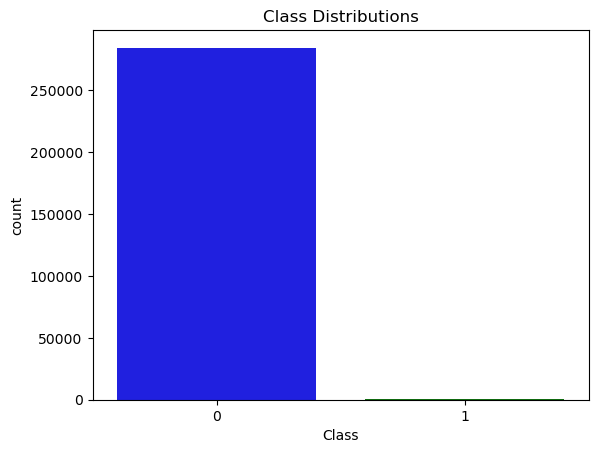

In [15]:
import seaborn as sns
sns.countplot(x='Class',data=data,palette=['blue','green'])
plt.title('Class Distributions')

**Like we mentioned above, that we are going to normalize our Time and Amount data, so when we visualize them we can see that it is lying between a single range of values.It will make it easier for us to process.**

Text(0.5, 1.0, 'Distribution of Transaction Time')

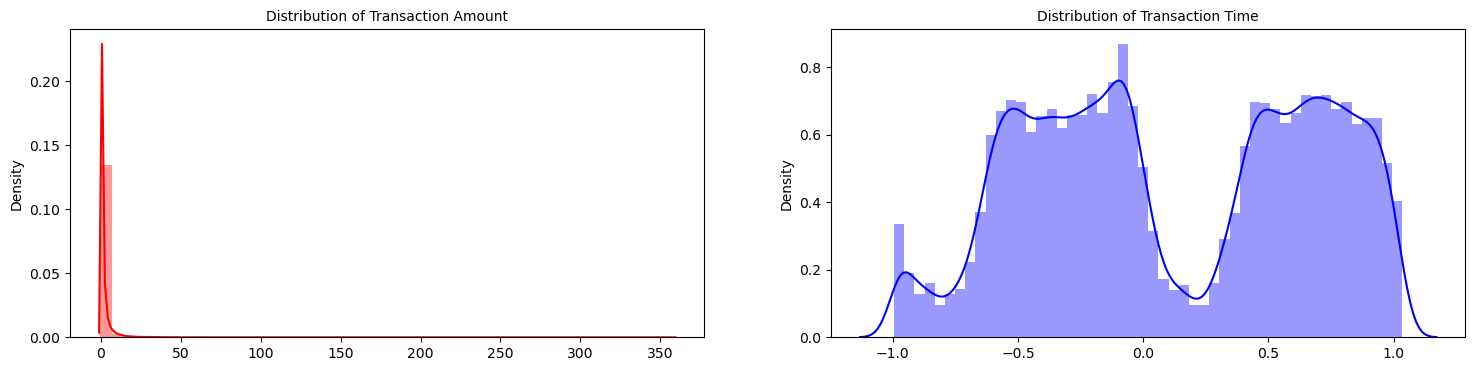

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_values = data['Amount'].values
time_values = data['Time'].values

sns.distplot(amount_values, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=10)
sns.distplot(time_values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=10)


**We are going to scatter plot the raw data set we have loaded to visualize how is the spread of the data, does the data have many outliers**

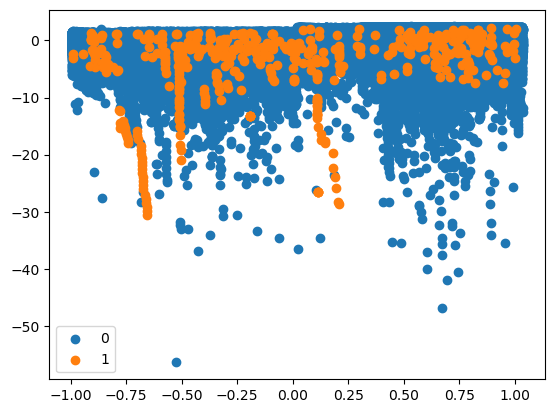

In [16]:
import matplotlib.pyplot as plt
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.show()

**As you can see the data is highly imbalanced, as there are only few dots of orange and compared to that very large amounts of dot for blue.**

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X,y,test_size=0.2,random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845, 1)
(56962, 1)


**Now wer are going to Reduce the Dimnensionality of our Dataset,using PCA. Even though PCA are generally used for Unsupervised datasets, we are going to use it here to check if there is much difference in the results we observe compared to other dimensionality reducing algorithims**

In [13]:
class PCA_Model:
  def __init__(self,n):
    self.n=n
    self.selected=None
    self.mean=None

  def fit(self,X):
    self.mean=np.mean(X,axis=0)
    X=X-self.mean
    cov=np.cov(X.T)
    eigenvectors,eigenvalues=np.linalg.eig(cov)
    eigenvectors=eigenvectors.T
    index=np.argsort(eigenvalues)[::-1]
    eigenvalues=eigenvalues[index]
    eigenvectors=eigenvectors[index]
    self.selected=eigenvectors[:self.n]

  def transform(self,X):
    X=X-self.mean
    return np.dot(X,self.selected.T)


**We have implemented PCA from Scratch here.**

In [15]:
import numpy as np

In [16]:
model=PCA_Model(2)
model.fit(X)
z=model.transform(X)

In [17]:
pca_df2 = pd.DataFrame(data = z,columns = ['principal component 1', 'principal component 2'])
pca_df2.head()

,principal component 1,principal component 2
0,13.662166,2.288804
1,-9.644080,2.641731
2,51.951476,-1.089894
3,2.859724,-2.355277
4,-0.654546,5.290000


**Once, we reduce our dimensionality we visualize our data set, it still looks highly imbalanced which should be the case**

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

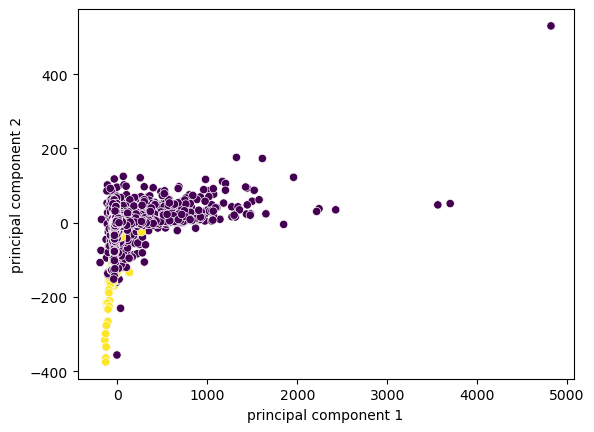

In [47]:
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y.values==0),  data=pca_df2,palette='viridis')
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y.values==1),  data=pca_df2,palette='viridis')

**Now like mentioned earlier, we are going to check how well this is going to work, as we are going to compute the F1 scores, kappa Scores and other things for different classifiers.**

In [18]:
y_pca1=data.iloc[:,-1:31]
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
X_train_pca1, X_test_pca1, y_train_pca1, y_test_pca1=tts(pca_df2,y_pca1,test_size=0.2,random_state=42)

In [49]:
classifiers = [('rfc', RandomForestClassifier()),('dtc', DecisionTreeClassifier()),('svc', SVC()),('knn', KNeighborsClassifier()),('lr', LogisticRegression()),('gnb', GaussianNB()), ('abc', AdaBoostClassifier()),('gbc', GradientBoostingClassifier()),('cbc', CatBoostClassifier())]
dict_accuracy = {}
dict_kappa = {}
dict_F1 ={}
for name, clf in classifiers:
    clf.fit(X_train_pca1, y_train_pca1)
    y_pred = clf.predict(X_test_pca1)
    f1 = f1_score(y_test_pca1, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test_pca1, y_pred)
    accuracy = accuracy_score(y_test_pca1, y_pred)
    dict_F1[f"{name}"]=f1
    dict_kappa[f"{name}"] = kappa
    dict_accuracy[f"{name}"]= accuracy

Learning rate set to 0.104628
0:	learn: 0.4060779	total: 38.3ms	remaining: 38.3s
1:	learn: 0.2276334	total: 77ms	remaining: 38.4s
2:	learn: 0.1239619	total: 116ms	remaining: 38.7s
3:	learn: 0.0753731	total: 155ms	remaining: 38.6s
4:	learn: 0.0488059	total: 197ms	remaining: 39.2s
5:	learn: 0.0330537	total: 233ms	remaining: 38.5s
6:	learn: 0.0236700	total: 269ms	remaining: 38.2s
7:	learn: 0.0179092	total: 306ms	remaining: 38s
8:	learn: 0.0142980	total: 341ms	remaining: 37.5s
9:	learn: 0.0117959	total: 379ms	remaining: 37.5s
10:	learn: 0.0102752	total: 428ms	remaining: 38.5s
11:	learn: 0.0092332	total: 465ms	remaining: 38.3s
12:	learn: 0.0087193	total: 501ms	remaining: 38s
13:	learn: 0.0081707	total: 536ms	remaining: 37.8s
14:	learn: 0.0078072	total: 566ms	remaining: 37.2s
15:	learn: 0.0075380	total: 589ms	remaining: 36.2s
16:	learn: 0.0073497	total: 618ms	remaining: 35.7s
17:	learn: 0.0072081	total: 645ms	remaining: 35.2s
18:	learn: 0.0070938	total: 671ms	remaining: 34.7s
19:	learn: 0.00

In [50]:
dict_accuracy

{'rfc': 0.9986657771847899,
 'dtc': 0.997559776693234,
 'svc': 0.9985253326779256,
 'knn': 0.9985077771145676,
 'lr': 0.9983848881710614,
 'gnb': 0.9905199957866648,
 'abc': 0.9982444436641972,
 'gbc': 0.9982093325374811,
 'cbc': 0.9982444436641972}

In [51]:
dict_F1

{'rfc': 0.7243037209182659,
 'dtc': 0.6761329767315059,
 'svc': 0.6375619918846989,
 'knn': 0.698208042271331,
 'lr': 0.6563121644611113,
 'gnb': 0.5822317837890697,
 'abc': 0.6662271989499652,
 'gbc': 0.5745518610945134,
 'cbc': 0.5278625889660985}

In [52]:
dict_kappa

{'rfc': 0.448725543479645,
 'dtc': 0.3522755180057948,
 'svc': 0.2754752225296424,
 'knn': 0.3965298694513196,
 'lr': 0.3127975733072187,
 'gnb': 0.16679605563902788,
 'abc': 0.3325371556113421,
 'gbc': 0.1494634561085666,
 'cbc': 0.05635871952904414}

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf = RandomForestClassifier()
clf.fit(X_train_pca1, y_train_pca1)
y_pred = clf.predict(X_test_pca1)
f1 = f1_score(y_test_pca1, y_pred, average='macro')
kappa = cohen_kappa_score(y_test_pca1, y_pred)
accuracy = accuracy_score(y_test_pca1, y_pred)

In [24]:
accuracy

0.9986482216214319

In [25]:
kappa

0.44548036191594054

In [26]:
f1

0.7226832253053295

In [27]:
import numpy as np
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

**Now wer are going to Reduce the Dimnensionality of our Dataset,using LDA.Earlier we used PCA,but now we are going to use LDA as it can perform better on Supervised datasets, let's see if this is still the case.**

In [28]:
class LDA_Model:
  def __init__(self,n):
    self.n=n
    self.l_disc=None
  
  def fit(self,X,y):
    n_features=X.shape[1]
    c_labels= np.unique(y)
    mean_ov=np.mean(X,axis=0)
    S_w=np.zeros((n_features,n_features))
    S_b=np.zeros((n_features,n_features))
    for i in c_labels:
      X_c=X[y==i]
      mean_c= np.mean(X_c,axis=0)
      S_w=S_w+((X_c-mean_c).T.dot(X_c-mean_c))
      n_c=X_c.shape[0]
      S_b=S_b+(n_c*((mean_c-mean_ov).reshape(n_features,1)).dot(((mean_c-mean_ov).reshape(n_features,1)).T))
      Mat=np.linalg.inv(S_w).dot(S_b)
      eigenvalues,eigenvectors=np.linalg.eig(Mat)
      eigenvectors=eigenvectors.T
      index=np.argsort(abs(eigenvalues))[::-1]
      eigenvalues=eigenvalues[index]
      eigenvectors=eigenvectors[index]
      self.l_disc=eigenvectors[0:self.n] 

  def transform(self,X):    
    return np.dot(X,self.l_disc.T)

**We have implemented LDA from scratch here**

In [29]:
x2=X1.to_numpy()

In [30]:
lda_model=LDA_Model(2)
lda_model.fit(x2,y1)
z1=lda_model.transform(x2)

In [31]:
pca_df3 = pd.DataFrame(data = z1,columns = ['principal component 1', 'principal component 2'])
pca_df3.head()

,principal component 1,principal component 2
0,0.049400+0.000000j,-0.688439+0.195205j
1,0.019577+0.000000j,0.735276-0.129138j
2,0.069611+0.000000j,-1.153583+1.039683j
3,0.024727+0.000000j,-0.364813-0.150461j
4,0.023320+0.000000j,0.044468-0.198441j


**We are going to visualize the reduced dataset,using LDA.As we can see the datasets are now much more clear and we can observe the datasets for different classes. AS purple represents class 0 and yellow class 1**

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

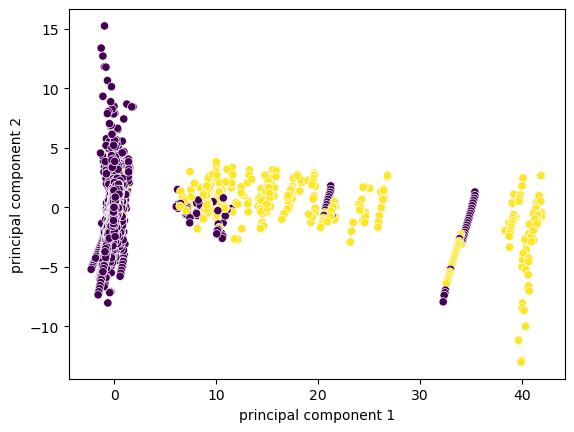

In [28]:
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y.values==0),  data=pca_df3,palette='viridis')
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y.values==1),  data=pca_df3,palette='viridis')

**When reducing our dataset using LDA, we obtain complex values so using this we store it hstack which makes it easier to compute later**

In [32]:
magnitude = np.abs(pca_df3)
phase = np.angle(pca_df3)
stacked_data = np.hstack((magnitude, phase))

In [33]:
y_lda1=data.iloc[:,-1:31]
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
X_train_lda1, X_test_lda1, y_train_lda1, y_test_lda1=tts(stacked_data,y_lda1,test_size=0.2,random_state=42)

**Here we are going to check the F1 score and other parameters for LDA**

In [61]:
classifiers = [('rfc', RandomForestClassifier()),('dtc', DecisionTreeClassifier()),('svc', SVC()),('knn', KNeighborsClassifier()),('lr', LogisticRegression()),('gnb', GaussianNB()), ('abc', AdaBoostClassifier()),('gbc', GradientBoostingClassifier()),('cbc', CatBoostClassifier())]
dict_accuracy = {}
dict_kappa = {}
dict_F1 ={}
for name, clf in classifiers:
    clf.fit(X_train_lda1, y_train_lda1)
    y_pred = clf.predict(X_test_lda1)
    f1 = f1_score(y_test_lda1, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test_lda1, y_pred)
    accuracy = accuracy_score(y_test_lda1, y_pred)
    dict_F1[f"{name}"]=f1
    dict_kappa[f"{name}"] = kappa
    dict_accuracy[f"{name}"]= accuracy

Learning rate set to 0.104628
0:	learn: 0.3463536	total: 32.5ms	remaining: 32.5s
1:	learn: 0.1804199	total: 54.6ms	remaining: 27.2s
2:	learn: 0.0922589	total: 77.9ms	remaining: 25.9s
3:	learn: 0.0507782	total: 106ms	remaining: 26.5s
4:	learn: 0.0299660	total: 136ms	remaining: 27s
5:	learn: 0.0191531	total: 166ms	remaining: 27.4s
6:	learn: 0.0132325	total: 199ms	remaining: 28.2s
7:	learn: 0.0098033	total: 230ms	remaining: 28.6s
8:	learn: 0.0077326	total: 259ms	remaining: 28.5s
9:	learn: 0.0064289	total: 287ms	remaining: 28.4s
10:	learn: 0.0055718	total: 318ms	remaining: 28.6s
11:	learn: 0.0049841	total: 350ms	remaining: 28.8s
12:	learn: 0.0045875	total: 379ms	remaining: 28.8s
13:	learn: 0.0042965	total: 411ms	remaining: 29s
14:	learn: 0.0040799	total: 441ms	remaining: 29s
15:	learn: 0.0039321	total: 469ms	remaining: 28.9s
16:	learn: 0.0038136	total: 499ms	remaining: 28.8s
17:	learn: 0.0037264	total: 524ms	remaining: 28.6s
18:	learn: 0.0036619	total: 553ms	remaining: 28.6s
19:	learn: 0.0

In [62]:
dict_accuracy

{'rfc': 0.9994382219725431,
 'dtc': 0.9990168884519505,
 'svc': 0.9994908886626171,
 'knn': 0.9995786664794073,
 'lr': 0.9991046662687406,
 'gnb': 0.9976826656367402,
 'abc': 0.9993328885923949,
 'gbc': 0.9985253326779256,
 'cbc': 0.9989642217618764}

In [63]:
dict_F1

{'rfc': 0.9079053176708349,
 'dtc': 0.8475799114685667,
 'svc': 0.9188669352769144,
 'knn': 0.9317126854578062,
 'lr': 0.8452303873659546,
 'gnb': 0.7764461842770006,
 'abc': 0.8987691166852988,
 'gbc': 0.6609212540393447,
 'cbc': 0.8436559690527248}

In [64]:
dict_kappa

{'rfc': 0.8158151393443253,
 'dtc': 0.6951619204308195,
 'svc': 0.8377361737673916,
 'knn': 0.8634280996728879,
 'lr': 0.6904766217347046,
 'gnb': 0.5530252627163663,
 'abc': 0.7975388393612102,
 'gbc': 0.3220915497906546,
 'cbc': 0.6873126508771601}

In [34]:
clf = KNeighborsClassifier()
clf.fit(X_train_pca1, y_train_pca1)
y_pred = clf.predict(X_test_pca1)
f1 = f1_score(y_test_pca1, y_pred, average='macro')
kappa = cohen_kappa_score(y_test_pca1, y_pred)
accuracy = accuracy_score(y_test_pca1, y_pred)

In [35]:
accuracy

0.9985077771145676

In [36]:
kappa

0.3965298694513196

In [37]:
f1

0.698208042271331

**Now wer are going to Reduce the Dimnensionality of our Dataset,using ICA.Earlier we used PCA,but now we are going to use ICA as it can perform better on Supervised datasets, let's see if this is still the case.**

In [38]:
from sklearn.decomposition import FastICA
import numpy as np
ica = FastICA(n_components=2)
ica.fit(X)
X_ica = ica.transform(X)

In [39]:
pca_df4 = pd.DataFrame(data = X_ica,columns = ['principal component 1', 'principal component 2'])
pca_df4.head()

,principal component 1,principal component 2
0,0.001361,0.000398
1,-0.000969,-0.000630
2,0.000888,0.002201
3,0.000961,0.000243
4,0.001340,-0.000219


**We are going to visualize the reduced dataset, as we can see that it did not make a better distincition of datapoints than LDA.**

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

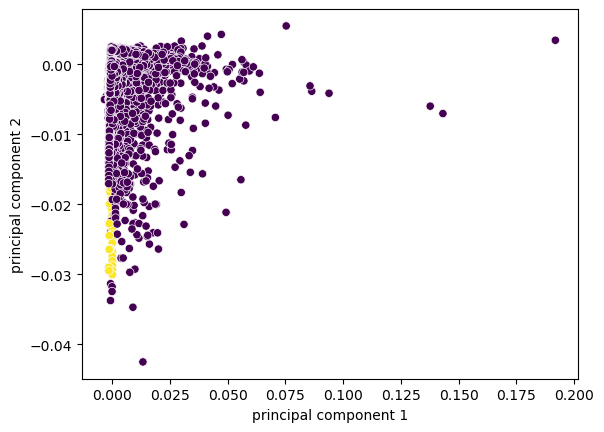

In [67]:
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y.values==0),  data=pca_df4,palette='viridis')
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y.values==1),  data=pca_df4,palette='viridis')

In [40]:
y_ica1=data.iloc[:,-1:31]
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
X_train_ica1, X_test_ica1, y_train_ica1, y_test_ica1=tts(pca_df4,y_ica1,test_size=0.2,random_state=42)

**Now let us apply the classifiers on ICA reduced Dataset and compare all the 3 Reduced Algorithims to see which one performed better.**

In [69]:
classifiers = [('rfc', RandomForestClassifier()),('dtc', DecisionTreeClassifier()),('svc', SVC()),('knn', KNeighborsClassifier()),('lr', LogisticRegression()),('gnb', GaussianNB()), ('lda', LinearDiscriminantAnalysis()),('abc', AdaBoostClassifier()),('gbc', GradientBoostingClassifier()),('cbc', CatBoostClassifier())]
dict_accuracy = {}
dict_kappa = {}
dict_F1 ={}
for name, clf in classifiers:
    clf.fit(X_train_ica1, y_train_ica1)
    y_pred = clf.predict(X_test_ica1)
    f1 = f1_score(y_test_ica1, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test_ica1, y_pred)
    accuracy = accuracy_score(y_test_ica1, y_pred)
    dict_F1[f"{name}"]=f1
    dict_kappa[f"{name}"] = kappa
    dict_accuracy[f"{name}"]= accuracy

Learning rate set to 0.104628
0:	learn: 0.4058669	total: 36.6ms	remaining: 36.5s
1:	learn: 0.2335446	total: 68.8ms	remaining: 34.3s
2:	learn: 0.1376017	total: 101ms	remaining: 33.4s
3:	learn: 0.0846371	total: 128ms	remaining: 32s
4:	learn: 0.0566290	total: 161ms	remaining: 32s
5:	learn: 0.0403386	total: 199ms	remaining: 32.9s
6:	learn: 0.0301184	total: 228ms	remaining: 32.4s
7:	learn: 0.0238934	total: 257ms	remaining: 31.9s
8:	learn: 0.0196968	total: 285ms	remaining: 31.4s
9:	learn: 0.0169148	total: 314ms	remaining: 31.1s
10:	learn: 0.0150846	total: 342ms	remaining: 30.8s
11:	learn: 0.0137421	total: 372ms	remaining: 30.6s
12:	learn: 0.0126968	total: 403ms	remaining: 30.6s
13:	learn: 0.0119280	total: 431ms	remaining: 30.4s
14:	learn: 0.0114559	total: 461ms	remaining: 30.2s
15:	learn: 0.0111130	total: 487ms	remaining: 30s
16:	learn: 0.0108190	total: 514ms	remaining: 29.7s
17:	learn: 0.0105861	total: 543ms	remaining: 29.6s
18:	learn: 0.0103757	total: 568ms	remaining: 29.3s
19:	learn: 0.01

In [70]:
dict_accuracy

{'rfc': 0.9985077771145676,
 'dtc': 0.9969628875390611,
 'svc': 0.9984551104244935,
 'knn': 0.9984551104244935,
 'lr': 0.9982795547909132,
 'gnb': 0.9920473297988133,
 'lda': 0.9916611074049366,
 'abc': 0.9982971103542713,
 'gbc': 0.9984199992977775,
 'cbc': 0.9979811102138267}

In [71]:
dict_F1

{'rfc': 0.6300613499276247,
 'dtc': 0.5772881336301997,
 'svc': 0.5922060037122945,
 'knn': 0.6136484784582491,
 'lr': 0.4995695183877146,
 'gnb': 0.5440952701082129,
 'lda': 0.542051572464299,
 'abc': 0.509674917414869,
 'gbc': 0.6307521173530903,
 'cbc': 0.49949476754913935}

In [72]:
dict_kappa

{'rfc': 0.2604934127024613,
 'dtc': 0.15457920471424824,
 'svc': 0.1849255016637572,
 'knn': 0.22769720571441598,
 'lr': 0.0,
 'gnb': 0.08966718529208328,
 'lda': 0.08573760874309089,
 'abc': 0.020167964700387064,
 'gbc': 0.2617953938709743,
 'cbc': -0.0005089122260817369}

In [41]:
clf =  GradientBoostingClassifier()
clf.fit(X_train_pca1, y_train_pca1)
y_pred = clf.predict(X_test_pca1)
f1 = f1_score(y_test_pca1, y_pred, average='macro')
kappa = cohen_kappa_score(y_test_pca1, y_pred)
accuracy = accuracy_score(y_test_pca1, y_pred)

In [ ]:
accuarcy

In [ ]:
kappa

In [ ]:
f1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, cohen_kappa_score
from sklearn.metrics import accuracy_score

In [74]:
classifiers = [('rfc', RandomForestClassifier()),('dtc', DecisionTreeClassifier()),('svc', SVC()),('knn', KNeighborsClassifier()),('lr', LogisticRegression()),('gnb', GaussianNB()), ('lda', LinearDiscriminantAnalysis()),('abc', AdaBoostClassifier()),('gbc', GradientBoostingClassifier()),('cbc', CatBoostClassifier())]
dict_accuracy = {}
dict_kappa = {}
dict_F1 ={}
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    dict_F1[f"{name}"]=f1
    dict_kappa[f"{name}"] = kappa
    dict_accuracy[f"{name}"]= accuracy

Learning rate set to 0.104628
0:	learn: 0.3511193	total: 50ms	remaining: 49.9s
1:	learn: 0.1758371	total: 99.2ms	remaining: 49.5s
2:	learn: 0.0957837	total: 152ms	remaining: 50.6s
3:	learn: 0.0522026	total: 204ms	remaining: 50.8s
4:	learn: 0.0305427	total: 247ms	remaining: 49.1s
5:	learn: 0.0193283	total: 303ms	remaining: 50.1s
6:	learn: 0.0129127	total: 358ms	remaining: 50.9s
7:	learn: 0.0093400	total: 413ms	remaining: 51.3s
8:	learn: 0.0071914	total: 456ms	remaining: 50.2s
9:	learn: 0.0058309	total: 500ms	remaining: 49.5s
10:	learn: 0.0049534	total: 547ms	remaining: 49.2s
11:	learn: 0.0043354	total: 594ms	remaining: 48.9s
12:	learn: 0.0038875	total: 640ms	remaining: 48.6s
13:	learn: 0.0035703	total: 687ms	remaining: 48.4s
14:	learn: 0.0033428	total: 730ms	remaining: 48s
15:	learn: 0.0031594	total: 771ms	remaining: 47.4s
16:	learn: 0.0029880	total: 818ms	remaining: 47.3s
17:	learn: 0.0028869	total: 862ms	remaining: 47s
18:	learn: 0.0028011	total: 908ms	remaining: 46.9s
19:	learn: 0.00

**We can also compare the Scores obatined from the 3 algorithims to the score obtained from not applying any reducing any dimensionality reduction.This will truly give us a sense, that was Dimensionality Reduction better or worse in this case**

In [75]:
dict_accuracy

{'rfc': 0.9996137776061234,
 'dtc': 0.9990871107053826,
 'svc': 0.999385555282469,
 'knn': 0.9994908886626171,
 'lr': 0.9991222218320986,
 'gnb': 0.9778273234788104,
 'lda': 0.9993679997191109,
 'abc': 0.9993153330290369,
 'gbc': 0.9989466661985184,
 'cbc': 0.9996488887328394}

In [76]:
dict_F1

{'rfc': 0.9374032950029891,
 'dtc': 0.8710585010067107,
 'svc': 0.8937855599570277,
 'knn': 0.9170153834947372,
 'lr': 0.8473412147096154,
 'gnb': 0.5506059716573894,
 'lda': 0.900940648210786,
 'abc': 0.8920937542486373,
 'gbc': 0.8311969286189986,
 'cbc': 0.9443565277191666}

In [77]:
dict_kappa

{'rfc': 0.874809091366814,
 'dtc': 0.7421174061504762,
 'svc': 0.7875819953081307,
 'knn': 0.8340344437971969,
 'lr': 0.6946991863504456,
 'gnb': 0.10958569295435949,
 'lda': 0.8018831722157707,
 'abc': 0.78418986707991,
 'gbc': 0.662399259706767,
 'cbc': 0.8887144469208431}

In [43]:
clf =  CatBoostClassifier()
clf.fit(X_train_pca1, y_train_pca1)
y_pred = clf.predict(X_test_pca1)
f1 = f1_score(y_test_pca1, y_pred, average='macro')
kappa = cohen_kappa_score(y_test_pca1, y_pred)
accuracy = accuracy_score(y_test_pca1, y_pred)

Learning rate set to 0.104628
0:	learn: 0.4060779	total: 88.2ms	remaining: 1m 28s
1:	learn: 0.2276334	total: 117ms	remaining: 58.5s
2:	learn: 0.1239619	total: 145ms	remaining: 48.3s
3:	learn: 0.0753731	total: 176ms	remaining: 43.7s
4:	learn: 0.0488059	total: 223ms	remaining: 44.4s
5:	learn: 0.0330537	total: 250ms	remaining: 41.5s
6:	learn: 0.0236700	total: 278ms	remaining: 39.4s
7:	learn: 0.0179092	total: 307ms	remaining: 38s
8:	learn: 0.0142980	total: 332ms	remaining: 36.6s
9:	learn: 0.0117959	total: 359ms	remaining: 35.5s
10:	learn: 0.0102752	total: 386ms	remaining: 34.7s
11:	learn: 0.0092332	total: 412ms	remaining: 33.9s
12:	learn: 0.0087193	total: 439ms	remaining: 33.3s
13:	learn: 0.0081707	total: 464ms	remaining: 32.7s
14:	learn: 0.0078072	total: 491ms	remaining: 32.3s
15:	learn: 0.0075380	total: 514ms	remaining: 31.6s
16:	learn: 0.0073497	total: 540ms	remaining: 31.2s
17:	learn: 0.0072081	total: 566ms	remaining: 30.9s
18:	learn: 0.0070938	total: 594ms	remaining: 30.6s
19:	learn: 

In [45]:
accuracy

0.9982444436641972

In [46]:
kappa

0.05635871952904414

In [47]:
f1

0.5278625889660985

**To deal with the issue of highly imbalanced data, we are going to apply SMOTE here.It basically does is Oversamples the minority class**

In [48]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(Xover, yover)
X_over1=X_over.copy()
X_over2=X_over.copy()

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X_over,y_over,test_size=0.2,random_state=42)

In [50]:
y_o=y_over.to_numpy()
y_o=y_o.flatten()
x_o=X_over.to_numpy()
x_o=x_o.flatten()

**WE can see the same using the counter function we used earlier to count the value of the classes.**

In [51]:
counter=Counter(y_o)
print(counter)

Counter({0: 284315, 1: 284315})


**Now,when we are going to visualize the data, we can see that even no of sample points unlike before.**

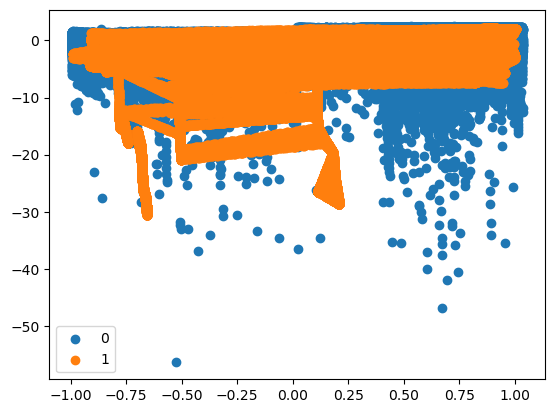

In [19]:
import matplotlib.pyplot as plt
for label, _ in counter.items():
    row_ix = where(y_over == label)[0]
    plt.scatter(X_over.iloc[row_ix, 0], X_over.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.show()

**We are going to calculate the scores and compare them to the other Dimensionality Redcution algorithims for this method and also compare it to the scores we got for the above methods.To see which one did better.**

In [52]:
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import numpy as np

**Similarly we are going to repeat it for LDA**

In [53]:
class LDA_Model:
  def __init__(self,n):
    self.n=n
    self.l_disc=None
  
  def fit(self,X,y):
    n_features=X.shape[1]
    c_labels= np.unique(y)
    mean_ov=np.mean(X,axis=0)
    S_w=np.zeros((n_features,n_features))
    S_b=np.zeros((n_features,n_features))
    for i in c_labels:
      X_c=X[y==i]
      mean_c= np.mean(X_c,axis=0)
      S_w=S_w+((X_c-mean_c).T.dot(X_c-mean_c))
      n_c=X_c.shape[0]
      S_b=S_b+(n_c*((mean_c-mean_ov).reshape(n_features,1)).dot(((mean_c-mean_ov).reshape(n_features,1)).T))
      Mat=np.linalg.inv(S_w).dot(S_b)
      eigenvalues,eigenvectors=np.linalg.eig(Mat)
      eigenvectors=eigenvectors.T
      index=np.argsort(abs(eigenvalues))[::-1]
      eigenvalues=eigenvalues[index]
      eigenvectors=eigenvectors[index]
      self.l_disc=eigenvectors[0:self.n] 

  def transform(self,X):    
    return np.dot(X,self.l_disc.T)

In [54]:
x2=X_over2.to_numpy()
y2=y_over.to_numpy()
y2=y2.flatten()
lda_model=LDA_Model(2)
lda_model.fit(x2,y2)
z3=lda_model.transform(x2)

In [55]:
pca_df6 = pd.DataFrame(data = z3,columns = ['principal component 1', 'principal component 2'])
pca_df6.head()

,principal component 1,principal component 2
0,-1.232928+0.000000j,-0.014045+0.000000j
1,-0.174001+0.000000j,0.120166+0.000000j
2,-0.060908+0.000000j,0.629114+0.000000j
3,-0.387908+0.000000j,0.028514+0.000000j
4,-0.920995+0.000000j,-0.203993+0.000000j


**In case of LDA, we can observe many outliers**

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

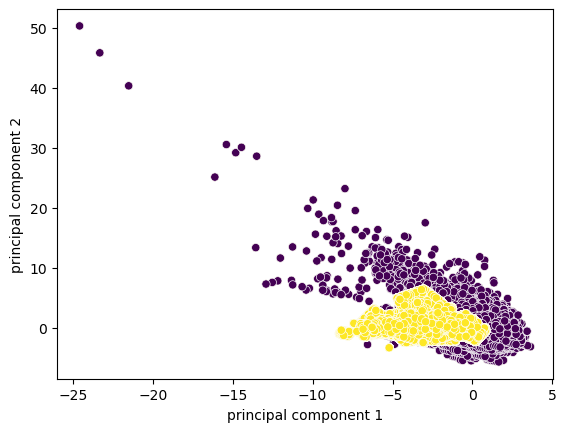

In [28]:
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y_over.values==0),  data=pca_df6,palette='viridis')
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y_over.values==1),  data=pca_df6,palette='viridis')

In [56]:
magnitude = np.abs(pca_df6)
phase = np.angle(pca_df6)
stacked_data = np.hstack((magnitude, phase))

In [57]:
y_lda2=y_over
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
X_train_lda2, X_test_lda2, y_train_lda2, y_test_lda2=tts(stacked_data,y_lda2,test_size=0.2,random_state=42)

**Observe the scores and compare it**

In [69]:
classifiers = [('dtc', DecisionTreeClassifier()),('svc', SVC()),('lr', LogisticRegression()),('gnb', GaussianNB()),('abc', AdaBoostClassifier())]
dict_kappa = {}
dict_F1 ={}
for name, clf in classifiers:
    clf.fit(X_train_lda2, y_train_lda2)
    y_pred = clf.predict(X_test_lda2)
    f1 = f1_score(y_test_lda2, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test_lda2, y_pred)
    accuracy = accuracy_score(y_test_lda2, y_pred)
    dict_F1[f"{name}"]=f1
    dict_kappa[f"{name}"] = kappa
    dict_accuracy[f"{name}"]= accuracy

In [71]:
dict_F1

{'dtc': 0.9722833286845469,
 'svc': 0.9363766652229621,
 'lr': 0.9340077448114257,
 'gnb': 0.9291170109203235,
 'abc': 0.9278195461506006}

In [72]:
dict_kappa

{'dtc': 0.9445674646771753,
 'svc': 0.8729229943455307,
 'lr': 0.8681370082055939,
 'gnb': 0.8582357147950875,
 'abc': 0.8559609018049105}

In [58]:
clf =  DecisionTreeClassifier()
clf.fit(X_train_pca1, y_train_pca1)
y_pred = clf.predict(X_test_pca1)
f1 = f1_score(y_test_pca1, y_pred, average='macro')
kappa = cohen_kappa_score(y_test_pca1, y_pred)
accuracy = accuracy_score(y_test_pca1, y_pred)

In [59]:
accuracy

0.99750711000316

In [61]:
f1

0.6706718899220746

**Repeat the same steps for ICA**

In [62]:
from sklearn.decomposition import FastICA
import numpy as np
ica = FastICA(n_components=2)
ica.fit(X_over2)
X_ica = ica.transform(X_over2)

In [64]:
pca_df7 = pd.DataFrame(data = X_ica,columns = ['principal component 1', 'principal component 2'])
pca_df7.head()

,principal component 1,principal component 2
0,-0.000278,0.000837
1,-0.000303,0.000821
2,-0.000322,0.000821
3,-0.000262,0.000863
4,-0.000212,0.000875


**In this case, we have almost a clear distinction of our dataset, which was not in the previous case**

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

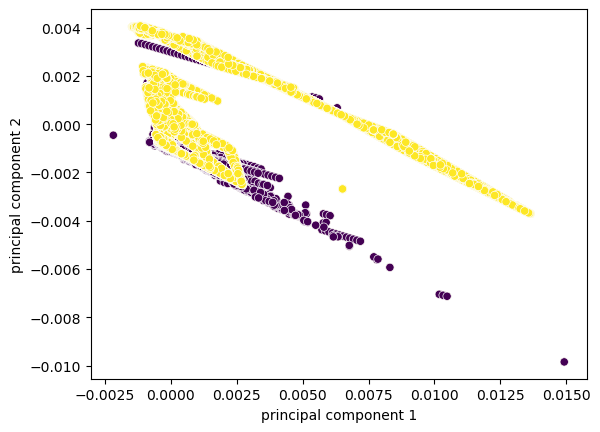

In [36]:
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y_over.values==0),  data=pca_df7,palette='viridis')
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y_over.values==1),  data=pca_df7,palette='viridis')

In [65]:
y_ica2=y_over
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
X_train_ica2, X_test_ica2, y_train_ica2, y_test_ica2=tts(pca_df7,y_ica2,test_size=0.2,random_state=42)

**Calculate and compare the scores**

In [38]:
classifiers = [('dtc', DecisionTreeClassifier()),('svc', SVC()),('lr', LogisticRegression()),('gnb', GaussianNB()),('abc', AdaBoostClassifier())]
dict_accuracy = {}
dict_kappa = {}
dict_F1 ={}
for name, clf in classifiers:
    clf.fit(X_train_ica2, y_train_ica2)
    y_pred = clf.predict(X_test_ica2)
    f1 = f1_score(y_test_ica2, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test_ica2, y_pred)
    accuracy = accuracy_score(y_test_ica2, y_pred)
    dict_F1[f"{name}"]=f1
    dict_kappa[f"{name}"] = kappa
    dict_accuracy[f"{name}"]= accuracy

In [39]:
dict_accuracy

{'dtc': 0.9282134252501627,
 'svc': 0.9319416843993458,
 'lr': 0.8795965742222535,
 'gnb': 0.8961978791129557,
 'abc': 0.9214075936900973}

In [40]:
dict_F1

{'dtc': 0.9279261441092006,
 'svc': 0.931735642035789,
 'lr': 0.8778924616160879,
 'gnb': 0.8955661696934663,
 'abc': 0.9209760634659234}

In [41]:
dict_kappa

{'dtc': 0.8564634342040331,
 'svc': 0.8639136211377951,
 'lr': 0.7593071097343879,
 'gnb': 0.792460730826089,
 'abc': 0.8428619594820457}

In [66]:
clf =  SVC()
clf.fit(X_train_pca1, y_train_pca1)
y_pred = clf.predict(X_test_pca1)
f1 = f1_score(y_test_pca1, y_pred, average='macro')
kappa = cohen_kappa_score(y_test_pca1, y_pred)
accuracy = accuracy_score(y_test_pca1, y_pred)

In [67]:
accuracy

0.9985253326779256

In [68]:
f1

0.6375619918846989

In [70]:
kappa

0.2754752225296424

**This is our last method we used for Resampling the dataset, In this we are Undersampling the Majority class and also Oversampling the Minority class.**

In [71]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_unover, y_unover = pipeline.fit_resample(Xunover, yunover)
X_unover1=X_unover.copy()
X_unover2=X_unover.copy()

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X_unover,y_unover,test_size=0.2,random_state=42)

In [73]:
y_uo=y_unover.to_numpy()
y_uo=y_uo.flatten()
x_uo=X_unover.to_numpy()
x_uo=x_uo.flatten()

**We repeat the same steps we did before, count the no of datapoints in each classes**

In [74]:
counter=Counter(y_uo)
print(counter)

Counter({0: 56862, 1: 28431})


**Visualize it, as you can we have more orange dots or denser orange colour than blue colour.**

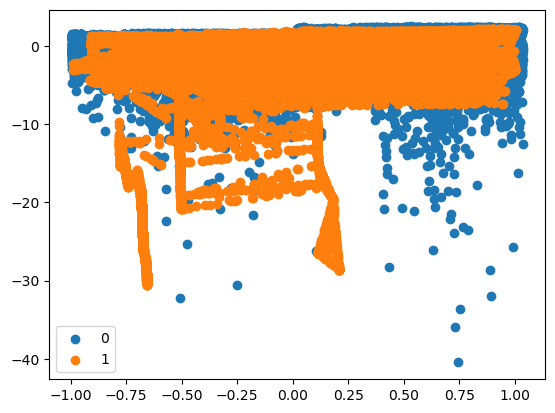

In [46]:
import matplotlib.pyplot as plt
for label, _ in counter.items():
    row_ix = where(y_unover == label)[0]
    plt.scatter(X_unover.iloc[row_ix, 0], X_unover.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.show()

**Apply the same 2 dimensionality Reduction method, and visualize the results and compare their score**

In [75]:
class LDA_Model:
  def __init__(self,n):
    self.n=n
    self.l_disc=None
  
  def fit(self,X,y):
    n_features=X.shape[1]
    c_labels= np.unique(y)
    mean_ov=np.mean(X,axis=0)
    S_w=np.zeros((n_features,n_features))
    S_b=np.zeros((n_features,n_features))
    for i in c_labels:
      X_c=X[y==i]
      mean_c= np.mean(X_c,axis=0)
      S_w=S_w+((X_c-mean_c).T.dot(X_c-mean_c))
      n_c=X_c.shape[0]
      S_b=S_b+(n_c*((mean_c-mean_ov).reshape(n_features,1)).dot(((mean_c-mean_ov).reshape(n_features,1)).T))
      Mat=np.linalg.inv(S_w).dot(S_b)
      eigenvalues,eigenvectors=np.linalg.eig(Mat)
      eigenvectors=eigenvectors.T
      index=np.argsort(abs(eigenvalues))[::-1]
      eigenvalues=eigenvalues[index]
      eigenvectors=eigenvectors[index]
      self.l_disc=eigenvectors[0:self.n] 

  def transform(self,X):    
    return np.dot(X,self.l_disc.T)

In [76]:
x2=X_unover2.to_numpy()
y2=y_unover.to_numpy()
y2=y2.flatten()
lda_model=LDA_Model(2)
lda_model.fit(x2,y2)
z3=lda_model.transform(x2)

In [77]:
pca_df9 = pd.DataFrame(data = z3,columns = ['principal component 1', 'principal component 2'])
pca_df9.head()

,principal component 1,principal component 2
0,0.902835+0.000000j,-1.128247+0.000000j
1,-0.420755+0.000000j,0.978750+0.000000j
2,-0.598069+0.000000j,-0.621476+0.000000j
3,-0.038321+0.000000j,-1.109467+0.000000j
4,0.029730+0.000000j,-0.934289+0.000000j


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

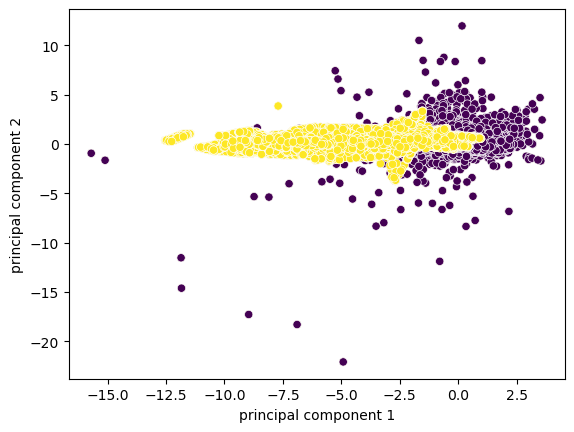

In [50]:
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y_unover.values==0),  data=pca_df9,palette='viridis')
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y_unover.values==1),  data=pca_df9,palette='viridis')

In [78]:
magnitude = np.abs(pca_df9)
phase = np.angle(pca_df9)
stacked_data = np.hstack((magnitude, phase))

In [79]:
y_lda3=y_unover
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
X_train_lda3, X_test_lda3, y_train_lda3, y_test_lda3=tts(stacked_data,y_lda3,test_size=0.2,random_state=42)

In [53]:
classifiers = [('rfc', RandomForestClassifier()),('dtc', DecisionTreeClassifier()),('svc', SVC()),('knn', KNeighborsClassifier()),('lr', LogisticRegression()),('gnb', GaussianNB()),('abc', AdaBoostClassifier()),('gbc', GradientBoostingClassifier()),('cbc', CatBoostClassifier())]
dict_accuracy = {}
dict_kappa = {}
dict_F1 ={}
for name, clf in classifiers:
    clf.fit(X_train_lda3, y_train_lda3)
    y_pred = clf.predict(X_test_lda3)
    f1 = f1_score(y_test_lda3, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test_lda3, y_pred)
    accuracy = accuracy_score(y_test_lda3, y_pred)
    dict_F1[f"{name}"]=f1
    dict_kappa[f"{name}"] = kappa
    dict_accuracy[f"{name}"]= accuracy

Learning rate set to 0.062525
0:	learn: 0.5936225	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.5060807	total: 79.9ms	remaining: 39.9s
2:	learn: 0.4390242	total: 99.2ms	remaining: 33s
3:	learn: 0.3840278	total: 116ms	remaining: 28.9s
4:	learn: 0.3422955	total: 125ms	remaining: 24.9s
5:	learn: 0.3026052	total: 135ms	remaining: 22.3s
6:	learn: 0.2788390	total: 148ms	remaining: 21s
7:	learn: 0.2539611	total: 164ms	remaining: 20.4s
8:	learn: 0.2346087	total: 177ms	remaining: 19.5s
9:	learn: 0.2180709	total: 190ms	remaining: 18.8s
10:	learn: 0.2089344	total: 198ms	remaining: 17.8s
11:	learn: 0.1989459	total: 206ms	remaining: 16.9s
12:	learn: 0.1881969	total: 220ms	remaining: 16.7s
13:	learn: 0.1813855	total: 231ms	remaining: 16.3s
14:	learn: 0.1747684	total: 242ms	remaining: 15.9s
15:	learn: 0.1687882	total: 253ms	remaining: 15.5s
16:	learn: 0.1659945	total: 261ms	remaining: 15.1s
17:	learn: 0.1623842	total: 273ms	remaining: 14.9s
18:	learn: 0.1591400	total: 281ms	remaining: 14.5s
19:	learn: 0

In [54]:
dict_accuracy

{'rfc': 0.9512280907438888,
 'dtc': 0.9334662055220119,
 'svc': 0.9490591476639897,
 'knn': 0.9506418899114837,
 'lr': 0.9491177677472302,
 'gnb': 0.941966117591887,
 'abc': 0.9481798464153819,
 'gbc': 0.9510522304941673,
 'cbc': 0.9524591124919397}

In [55]:
dict_F1

{'rfc': 0.9451106716382562,
 'dtc': 0.9258102797902028,
 'svc': 0.9417963998409795,
 'knn': 0.9445143451634307,
 'lr': 0.9419264604907603,
 'gnb': 0.9350657454900471,
 'abc': 0.9406932276456683,
 'gbc': 0.9445086254427106,
 'cbc': 0.9462500287061392}

In [56]:
dict_kappa

{'rfc': 0.890226668574456,
 'dtc': 0.8516265910733869,
 'svc': 0.8836824247082072,
 'knn': 0.8890318606991375,
 'lr': 0.8839332202369281,
 'gnb': 0.8701317326560826,
 'abc': 0.8814929427498486,
 'gbc': 0.8890499381346518,
 'cbc': 0.8925193597974559}

In [80]:
clf =  CatBoostClassifier()
clf.fit(X_train_pca1, y_train_pca1)
y_pred = clf.predict(X_test_pca1)
f1 = f1_score(y_test_pca1, y_pred, average='macro')
kappa = cohen_kappa_score(y_test_pca1, y_pred)
accuracy = accuracy_score(y_test_pca1, y_pred)

Learning rate set to 0.104628
0:	learn: 0.4060779	total: 27.3ms	remaining: 27.3s
1:	learn: 0.2276334	total: 55.7ms	remaining: 27.8s
2:	learn: 0.1239619	total: 83.7ms	remaining: 27.8s
3:	learn: 0.0753731	total: 113ms	remaining: 28.1s
4:	learn: 0.0488059	total: 143ms	remaining: 28.4s
5:	learn: 0.0330537	total: 176ms	remaining: 29.2s
6:	learn: 0.0236700	total: 205ms	remaining: 29.1s
7:	learn: 0.0179092	total: 231ms	remaining: 28.7s
8:	learn: 0.0142980	total: 256ms	remaining: 28.2s
9:	learn: 0.0117959	total: 281ms	remaining: 27.8s
10:	learn: 0.0102752	total: 306ms	remaining: 27.5s
11:	learn: 0.0092332	total: 333ms	remaining: 27.4s
12:	learn: 0.0087193	total: 364ms	remaining: 27.6s
13:	learn: 0.0081707	total: 389ms	remaining: 27.4s
14:	learn: 0.0078072	total: 418ms	remaining: 27.4s
15:	learn: 0.0075380	total: 441ms	remaining: 27.1s
16:	learn: 0.0073497	total: 470ms	remaining: 27.2s
17:	learn: 0.0072081	total: 496ms	remaining: 27s
18:	learn: 0.0070938	total: 522ms	remaining: 27s
19:	learn: 0

In [81]:
accuracy

0.9982444436641972

In [82]:
kappa

0.05635871952904414

In [83]:
f1

0.5278625889660985

In [57]:
from sklearn.decomposition import FastICA
import numpy as np
ica = FastICA(n_components=2)
ica.fit(X_unover2)
X_ica = ica.transform(X_unover2)

In [58]:
pca_df10 = pd.DataFrame(data = X_ica,columns = ['principal component 1', 'principal component 2'])
pca_df10.head()

,principal component 1,principal component 2
0,-0.006240,-0.006598
1,0.000692,-0.001613
2,0.000785,-0.001648
3,0.000888,-0.001542
4,0.000771,-0.001625


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

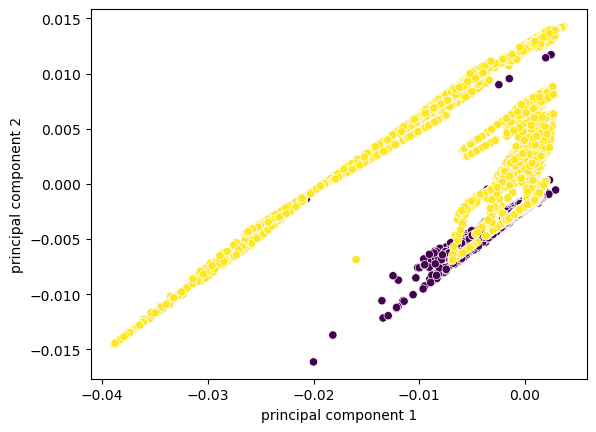

In [59]:
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y_unover.values==0),  data=pca_df10,palette='viridis')
sns.scatterplot(x="principal component 1", y="principal component 2",c=(y_unover.values==1),  data=pca_df10,palette='viridis')

In [60]:
y_ica3=y_unover
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
X_train_ica3, X_test_ica3, y_train_ica3, y_test_ica3=tts(pca_df10,y_ica3,test_size=0.2,random_state=42)

In [61]:
classifiers = [('rfc', RandomForestClassifier()),('dtc', DecisionTreeClassifier()),('svc', SVC()),('knn', KNeighborsClassifier()),('lr', LogisticRegression()),('gnb', GaussianNB()), ('abc', AdaBoostClassifier()),('gbc', GradientBoostingClassifier()),('cbc', CatBoostClassifier())]
dict_accuracy = {}
dict_kappa = {}
dict_F1 ={}
for name, clf in classifiers:
    clf.fit(X_train_ica3, y_train_ica3)
    y_pred = clf.predict(X_test_ica3)
    f1 = f1_score(y_test_ica3, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test_ica3, y_pred)
    accuracy = accuracy_score(y_test_ica3, y_pred)
    dict_F1[f"{name}"]=f1
    dict_kappa[f"{name}"] = kappa
    dict_accuracy[f"{name}"]= accuracy

Learning rate set to 0.062525
0:	learn: 0.5897757	total: 9.31ms	remaining: 9.3s
1:	learn: 0.5124890	total: 19ms	remaining: 9.48s
2:	learn: 0.4403494	total: 28.2ms	remaining: 9.37s
3:	learn: 0.3847778	total: 37.6ms	remaining: 9.36s
4:	learn: 0.3492816	total: 46.5ms	remaining: 9.26s
5:	learn: 0.3171316	total: 57ms	remaining: 9.45s
6:	learn: 0.2903242	total: 67.3ms	remaining: 9.55s
7:	learn: 0.2639108	total: 76.7ms	remaining: 9.52s
8:	learn: 0.2421695	total: 84.2ms	remaining: 9.27s
9:	learn: 0.2272726	total: 94.2ms	remaining: 9.33s
10:	learn: 0.2160378	total: 104ms	remaining: 9.33s
11:	learn: 0.2044474	total: 114ms	remaining: 9.35s
12:	learn: 0.1958001	total: 123ms	remaining: 9.36s
13:	learn: 0.1887811	total: 132ms	remaining: 9.32s
14:	learn: 0.1823830	total: 141ms	remaining: 9.24s
15:	learn: 0.1770875	total: 152ms	remaining: 9.32s
16:	learn: 0.1727754	total: 161ms	remaining: 9.31s
17:	learn: 0.1686736	total: 170ms	remaining: 9.28s
18:	learn: 0.1655177	total: 179ms	remaining: 9.26s
19:	le

In [62]:
dict_accuracy

{'rfc': 0.959845242980245,
 'dtc': 0.9411454364265197,
 'svc': 0.9497625886628759,
 'knn': 0.9579107802333079,
 'lr': 0.698985872559939,
 'gnb': 0.9223870097895539,
 'abc': 0.9506418899114837,
 'gbc': 0.9542177149891553,
 'cbc': 0.9568556187349786}

In [63]:
dict_F1

{'rfc': 0.954401982953581,
 'dtc': 0.9341418497103497,
 'svc': 0.9418695275030265,
 'knn': 0.9523900958155986,
 'lr': 0.5026628227060157,
 'gnb': 0.9099168032146381,
 'abc': 0.9436234600114797,
 'gbc': 0.9473938252846883,
 'cbc': 0.9506693729819524}

In [64]:
dict_kappa

{'rfc': 0.9088383719453152,
 'dtc': 0.8682839020121408,
 'svc': 0.8839670689333279,
 'knn': 0.9047990923038948,
 'lr': 0.13484423590062844,
 'gnb': 0.8202520653795892,
 'abc': 0.8873309840590006,
 'gbc': 0.8949182331385324,
 'cbc': 0.9014199925375374}

**Similarly, compare the scores for this method without applying any Dimensionality Reduction and observe the scores**

In [65]:
classifiers = [('rfc', RandomForestClassifier()),('dtc', DecisionTreeClassifier()),('svc', SVC()),('knn', KNeighborsClassifier()),('lr', LogisticRegression()),('gnb', GaussianNB()), ('abc', AdaBoostClassifier()),('gbc', GradientBoostingClassifier()),('cbc', CatBoostClassifier())]
dict_accuracy = {}
dict_kappa = {}
dict_F1 ={}
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    kappa = cohen_kappa_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    dict_F1[f"{name}"]=f1
    dict_kappa[f"{name}"] = kappa
    dict_accuracy[f"{name}"]= accuracy

Learning rate set to 0.062525
0:	learn: 0.5725595	total: 20.2ms	remaining: 20.2s
1:	learn: 0.4781147	total: 39.6ms	remaining: 19.8s
2:	learn: 0.4097073	total: 59.3ms	remaining: 19.7s
3:	learn: 0.3448058	total: 77.4ms	remaining: 19.3s
4:	learn: 0.3005555	total: 92.6ms	remaining: 18.4s
5:	learn: 0.2674560	total: 109ms	remaining: 18.1s
6:	learn: 0.2357337	total: 128ms	remaining: 18.2s
7:	learn: 0.2116726	total: 146ms	remaining: 18.1s
8:	learn: 0.1931227	total: 164ms	remaining: 18s
9:	learn: 0.1794777	total: 184ms	remaining: 18.2s
10:	learn: 0.1704499	total: 202ms	remaining: 18.1s
11:	learn: 0.1602962	total: 228ms	remaining: 18.7s
12:	learn: 0.1510988	total: 248ms	remaining: 18.8s
13:	learn: 0.1438465	total: 267ms	remaining: 18.8s
14:	learn: 0.1381923	total: 284ms	remaining: 18.7s
15:	learn: 0.1330062	total: 303ms	remaining: 18.6s
16:	learn: 0.1277103	total: 320ms	remaining: 18.5s
17:	learn: 0.1219164	total: 341ms	remaining: 18.6s
18:	learn: 0.1179483	total: 360ms	remaining: 18.6s
19:	lear

In [66]:
dict_accuracy

{'rfc': 0.998417257752506,
 'dtc': 0.9900932059323524,
 'svc': 0.9697520370478926,
 'knn': 0.9942552318424293,
 'lr': 0.9575590597338648,
 'gnb': 0.9312386423588721,
 'abc': 0.9663520722199426,
 'gbc': 0.9766105867870333,
 'cbc': 0.9988862184184302}

In [67]:
dict_F1

{'rfc': 0.998225943898756,
 'dtc': 0.9889223597347896,
 'svc': 0.9655288227476677,
 'knn': 0.993592845580443,
 'lr': 0.9515242102711536,
 'gnb': 0.9210661731400906,
 'abc': 0.9619763057574315,
 'gbc': 0.9735247281886198,
 'cbc': 0.9987536270956604}

In [68]:
dict_kappa

{'rfc': 0.9964518927309987,
 'dtc': 0.9778448360123664,
 'svc': 0.9310982661058955,
 'knn': 0.9871861628076939,
 'lr': 0.9031207036326798,
 'gnb': 0.842314399407726,
 'abc': 0.923964899008598,
 'gbc': 0.9470614160794958,
 'cbc': 0.9975072576517137}

In [84]:
clf =  CatBoostClassifier()
clf.fit(X_train_pca1, y_train_pca1)
y_pred = clf.predict(X_test_pca1)
f1 = f1_score(y_test_pca1, y_pred, average='macro')
kappa = cohen_kappa_score(y_test_pca1, y_pred)
accuracy = accuracy_score(y_test_pca1, y_pred)

Learning rate set to 0.104628
0:	learn: 0.4060779	total: 23.5ms	remaining: 23.5s
1:	learn: 0.2276334	total: 50.7ms	remaining: 25.3s
2:	learn: 0.1239619	total: 79.4ms	remaining: 26.4s
3:	learn: 0.0753731	total: 107ms	remaining: 26.6s
4:	learn: 0.0488059	total: 136ms	remaining: 27.1s
5:	learn: 0.0330537	total: 163ms	remaining: 27s
6:	learn: 0.0236700	total: 190ms	remaining: 27s
7:	learn: 0.0179092	total: 216ms	remaining: 26.8s
8:	learn: 0.0142980	total: 241ms	remaining: 26.5s
9:	learn: 0.0117959	total: 266ms	remaining: 26.3s
10:	learn: 0.0102752	total: 292ms	remaining: 26.2s
11:	learn: 0.0092332	total: 317ms	remaining: 26.1s
12:	learn: 0.0087193	total: 342ms	remaining: 26s
13:	learn: 0.0081707	total: 367ms	remaining: 25.8s
14:	learn: 0.0078072	total: 394ms	remaining: 25.9s
15:	learn: 0.0075380	total: 417ms	remaining: 25.6s
16:	learn: 0.0073497	total: 444ms	remaining: 25.7s
17:	learn: 0.0072081	total: 468ms	remaining: 25.5s
18:	learn: 0.0070938	total: 493ms	remaining: 25.5s
19:	learn: 0.0

In [85]:
accuracy

0.9982444436641972

In [87]:
f1

0.5278625889660985

**We can observe the scores for the dimensionality method for each Resampling method and also the overall method.**